# Аверьянов Алексей. Итоговый (курсовой проект)

**Подключаем библиотеки**

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

**Пути к файлам**

In [8]:
DATASET_PATH = 'data/train.csv'
TEST_DATASET_PATH = 'data/test.csv'

## Загрузка данных

**Описание датасета**

Статистические данные о ценах на недвижимость в каком-то городе. Учебный датасет.

* **Id** - идентификационный номер квартиры
* **DistrictId** - идентификационный номер района
* **Rooms** - количество комнат
* **Square** - площадь
* **LifeSquare** - жилая площадь
* **KitchenSquare** - площадь кухни
* **Floor** - этаж
* **HouseFloor** - количество этажей в доме
* **HouseYear** - год постройки дома
* **Ecology_1, Ecology_2, Ecology_3** - экологические показатели местности
* **Social_1, Social_2, Social_3** - социальные показатели местности
* **Healthcare_1, Helthcare_2** - показатели местности, связанные с охраной здоровья
* **Shops_1, Shops_2** - показатели, связанные с наличием магазинов, торговых центров
* **Price** - цена квартиры

In [9]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

df = pd.read_csv(DATASET_PATH, index_col='Id')
df.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
Id,,,,,,,,,,,,,,,,,,,
14038,35,2.000,47.982,29.443,6.000,7,9.000,1969,0.089,B,B,33,7976,5,nan,0,11,B,184966.931
15053,41,3.000,65.684,40.050,8.000,7,9.000,1978,0.000,B,B,46,10309,1,240.000,1,16,B,300009.450
4765,53,2.000,44.948,29.198,0.000,8,12.000,1968,0.050,B,B,34,7759,0,229.000,1,3,B,220925.909
5809,58,2.000,53.353,52.732,9.000,8,17.000,1977,0.438,B,B,23,5735,3,1084.000,0,5,B,175616.227
10783,99,1.000,39.649,23.776,7.000,11,12.000,1976,0.012,B,B,35,5776,1,2078.000,2,4,B,150226.532


In [14]:
df.shape

(10000, 19)

## Получение информации о данных

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 14038 to 6306
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DistrictId     10000 non-null  int64  
 1   Rooms          10000 non-null  float64
 2   Square         10000 non-null  float64
 3   LifeSquare     7887 non-null   float64
 4   KitchenSquare  10000 non-null  float64
 5   Floor          10000 non-null  int64  
 6   HouseFloor     10000 non-null  float64
 7   HouseYear      10000 non-null  int64  
 8   Ecology_1      10000 non-null  float64
 9   Ecology_2      10000 non-null  object 
 10  Ecology_3      10000 non-null  object 
 11  Social_1       10000 non-null  int64  
 12  Social_2       10000 non-null  int64  
 13  Social_3       10000 non-null  int64  
 14  Healthcare_1   5202 non-null   float64
 15  Helthcare_2    10000 non-null  int64  
 16  Shops_1        10000 non-null  int64  
 17  Shops_2        10000 non-null  object 
 18  Pri

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
DistrictId,10000.000,50.401,43.588,0.000,20.000,36.000,75.000,209.000
Rooms,10000.000,1.891,0.840,0.000,1.000,2.000,2.000,19.000
Square,10000.000,56.316,21.059,1.137,41.775,52.513,65.901,641.065
LifeSquare,7887.000,37.200,86.241,0.371,22.770,32.781,45.129,7480.592
KitchenSquare,10000.000,6.273,28.561,0.000,1.000,6.000,9.000,2014.000
Floor,10000.000,8.527,5.241,1.000,4.000,7.000,12.000,42.000
HouseFloor,10000.000,12.609,6.776,0.000,9.000,13.000,17.000,117.000
HouseYear,10000.000,3990.166,200500.261,1910.000,1974.000,1977.000,2001.000,20052011.000
Ecology_1,10000.000,0.119,0.119,0.000,0.018,0.075,0.196,0.522
Social_1,10000.000,24.687,17.533,0.000,6.000,25.000,36.000,74.000


In [17]:
df.describe(include='object')

,Ecology_2,Ecology_3,Shops_2
count,10000,10000,10000
unique,2,2,2
top,B,B,B
freq,9903,9725,9175


In [8]:
df['Ecology_2'].value_counts()

B    9903
A      97
Name: Ecology_2, dtype: int64

In [9]:
df['Ecology_3'].value_counts()

B    9725
A     275
Name: Ecology_3, dtype: int64

In [10]:
df['Shops_2'].value_counts()

B    9175
A     825
Name: Shops_2, dtype: int64

## Обработка пропусков

In [11]:
df.isna().sum()

DistrictId          0
Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

### Пропуски LifeSquare

Квартиры, у которых пропущен **"LifeSquare"**:

In [18]:
df[(df['LifeSquare'].isna())].groupby("Rooms")["Rooms"].agg('count')

Rooms
0.000      3
1.000    878
2.000    828
3.000    393
4.000      9
5.000      2
Name: Rooms, dtype: int64

Рассчитаем признак **"LifeSquare_proportion"** (доля жилой площади в общей площади квартиры) и проанализируем этот признак для квартир с разным количество комнат.

Ниже представлены статистические показатели и графики, на которых видно, что у подавляющего квартир значение показателя **"LifeSquare_proportion"** имеет очень небольшой разброс (см. 1 и 3 квартильи и графики).

Значит для квартир с пустым признаком **"LifeSquare"** можно заполнить признак **"LifeSquare_proportion"** значением медианы квартир с таким же размером комнат и через него рассчитать **"LifeSquare"**.

**Показатели разброса LifeSquare_proportion для кварир с разными комнатами**

In [19]:
df['LifeSquare_proportion'] = df['LifeSquare'] / df['Square']

df_rooms = df.groupby("Rooms")["LifeSquare_proportion"].describe()
df_rooms

,count,mean,std,min,25%,50%,75%,max
Rooms,,,,,,,,
0.000,5.000,0.763,0.304,0.367,0.500,0.970,0.984,0.992
1.000,2827.000,0.624,0.287,0.010,0.504,0.565,0.662,9.315
2.000,3052.000,0.659,0.285,0.013,0.579,0.628,0.686,12.303
3.000,1842.000,0.739,2.159,0.006,0.600,0.648,0.722,91.568
4.000,141.000,0.678,0.156,0.015,0.627,0.663,0.730,1.034
5.000,16.000,0.719,0.127,0.551,0.642,0.688,0.776,0.987
6.000,1.000,0.651,nan,0.651,0.651,0.651,0.651,0.651
10.000,2.000,0.622,0.013,0.613,0.618,0.622,0.627,0.631
19.000,1.000,0.518,nan,0.518,0.518,0.518,0.518,0.518


**Графики разброса LifeSquare_proportion для кварир с 1, 2, 3 и 4 комнатами**

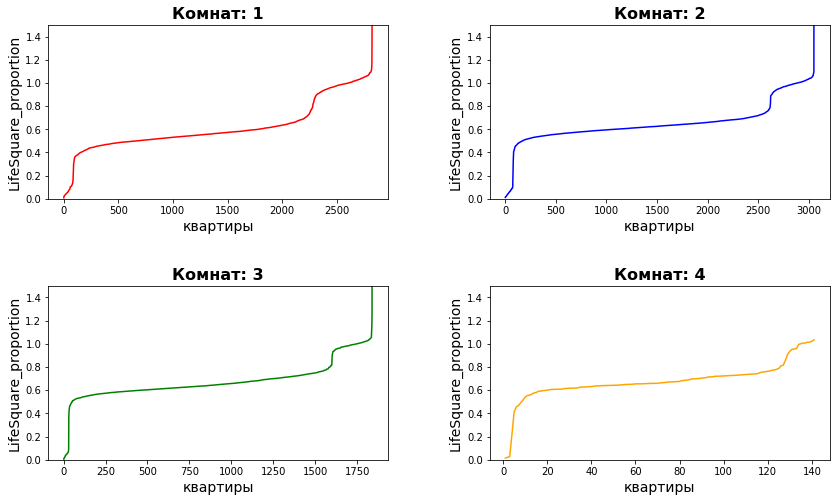

In [21]:
#функция для отрисовки графика
def paint_graph(graph, rooms, col):   
    
    y = df[(df['Rooms'] == rooms) & (df['LifeSquare'].notna())]['LifeSquare_proportion'].sort_values()
    y.index = np.arange(1, y.size+1, 1)
    
    title_font = {
        "size": 16,
        "weight": "bold"
    }

    legend_font = {
        "size": 14,
        "weight": "normal"
    }

    graph.plot(y, color=col)
    graph.set_title(f'Комнат: {rooms}', fontdict=title_font)
    graph.set_ylim([0, 1.5])
    graph.set_xlabel('квартиры', fontdict=legend_font)
    graph.set_ylabel('LifeSquare_proportion', fontdict=legend_font)

    return None
   
    
#основной код
fig, ax = plt.subplots(nrows=2, ncols=2)
room1, room2, room3, room4 = ax.flatten()


fig.set_size_inches(14, 8)
fig.subplots_adjust(wspace=0.3, hspace=0.5)

paint_graph(room1, 1, 'red')
paint_graph(room2, 2, 'blue')
paint_graph(room3, 3, 'green')
paint_graph(room4, 4, 'orange')


plt.show()

**Рассчитываем и заполняем пропущенные значения "LifeSquare"**

In [61]:
def fill_life_square_proportion(x, rooms_median):
    return rooms_median[x]


# строки с пустыми LifeSquare
df_na = df[(df['LifeSquare'].isna())]

#медианы LifeSquare_proportion по разному количеству комнат
df_median = df.groupby("Rooms")["LifeSquare_proportion"].median() 

#заполняем LifeSquare_proportion медианой для квартир с таким же количеством комнат
df.loc[df['LifeSquare'].isna(), "LifeSquare_proportion"] = df_na['Rooms'].apply(fill_life_square_proportion, args=[df_median])

#рассчитываем и заполняем LifeSquare
df.loc[df['LifeSquare'].isna(), "LifeSquare"] = df_na['Square'] * df_na['LifeSquare_proportion']


Проверяем, что **"LifeSquare"** заполнены

In [75]:
df['LifeSquare'].isna().sum()

0

## Черновик

In [76]:
df['Healthcare_1'].value_counts()

540.000     511
30.000      348
1046.000    245
750.000     163
229.000     148
           ... 
370.000      14
32.000       12
1815.000     10
35.000        2
0.000         1
Name: Healthcare_1, Length: 79, dtype: int64

In [80]:
df2 = df.loc[df['Healthcare_1'].isna()]

df2

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,LifeSquare_proportion
Id,,,,,,,,,,,,,,,,,,,,
14038,35,2.000,47.982,29.443,6.000,7,9.000,1969,0.089,B,B,33,7976,5,nan,0,11,B,184966.931,0.614
14549,154,2.000,62.254,37.160,7.000,3,5.000,1960,0.461,B,B,20,4386,14,nan,1,5,B,296021.204,0.597
11993,74,2.000,80.313,50.406,0.000,14,0.000,1977,0.076,B,B,6,1437,3,nan,0,2,B,221244.157,0.628
5172,1,2.000,64.511,40.489,1.000,9,17.000,1977,0.007,B,B,1,264,0,nan,0,1,B,229102.796,0.628
8649,23,1.000,46.461,18.916,8.000,13,17.000,2014,0.076,B,B,6,1437,3,nan,0,2,B,95380.221,0.407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14333,150,3.000,78.250,49.385,10.000,5,16.000,1976,0.300,B,B,52,10311,6,nan,1,9,B,342418.759,0.631
48,13,3.000,80.631,48.899,10.000,11,14.000,1999,0.091,B,B,74,19083,2,nan,5,15,B,350684.629,0.606
4158,23,2.000,64.864,40.710,1.000,17,17.000,1977,0.076,B,B,6,1437,3,nan,0,2,B,171323.516,0.628


In [87]:
df.corr()['Price'].sort_values(ascending=False)

Price                    1.000
Rooms                    0.550
Square                   0.520
DistrictId               0.265
Social_1                 0.263
Helthcare_2              0.253
Social_2                 0.239
Shops_1                  0.181
Healthcare_1             0.139
Floor                    0.129
LifeSquare               0.094
HouseFloor               0.088
Social_3                 0.075
KitchenSquare            0.029
LifeSquare_proportion    0.006
HouseYear                0.004
Ecology_1               -0.058
Name: Price, dtype: float64

In [1]:
import seaborn as sns

In [5]:
import matplotlib
plt.style.use('seaborn-ticks')
#plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (6, 4)
matplotlib.rcParams.update({'font.size': 14})

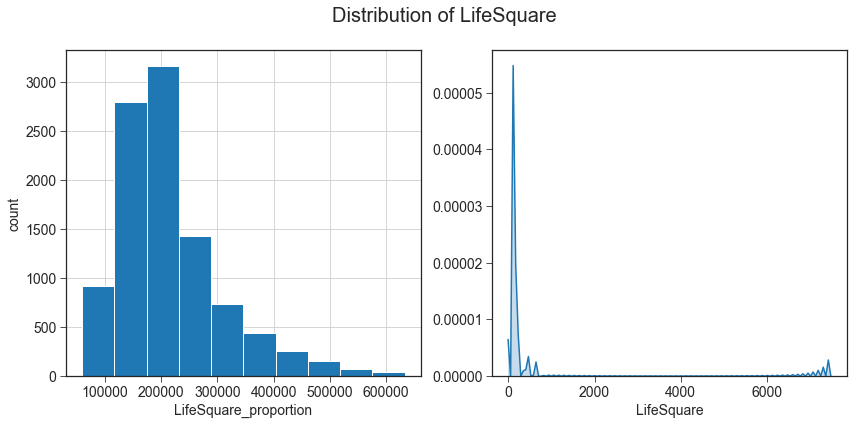

In [41]:
plt.figure(figsize = (14, 6))

plt.subplot(121)
df['Price'].hist(edgecolor='white')
plt.ylabel('count')
plt.xlabel('LifeSquare_proportion')

plt.subplot(122)
sns.kdeplot(df['LifeSquare'], shade=True, legend=False)
plt.xlabel('LifeSquare')

plt.suptitle('Distribution of LifeSquare', size=20);

In [36]:
feature_num_names = df.select_dtypes(include='float64').columns.tolist()
feature_num_names

['Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'HouseFloor',
 'Ecology_1',
 'Healthcare_1',
 'Price',
 'LifeSquare_proportion']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000BEB8A4AF48>,
      dtype=object)

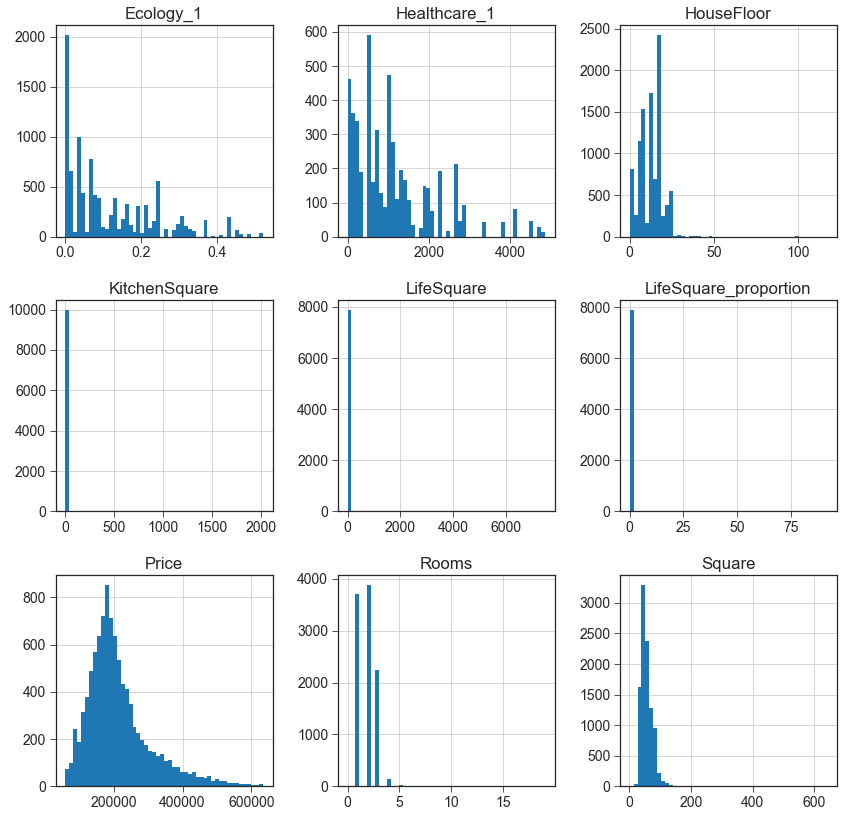

In [37]:
df[feature_num_names].hist(figsize=(14,14), bins=50, grid=True)

ValueError: supplied range of [-inf, 4.762173934797756] is not finite

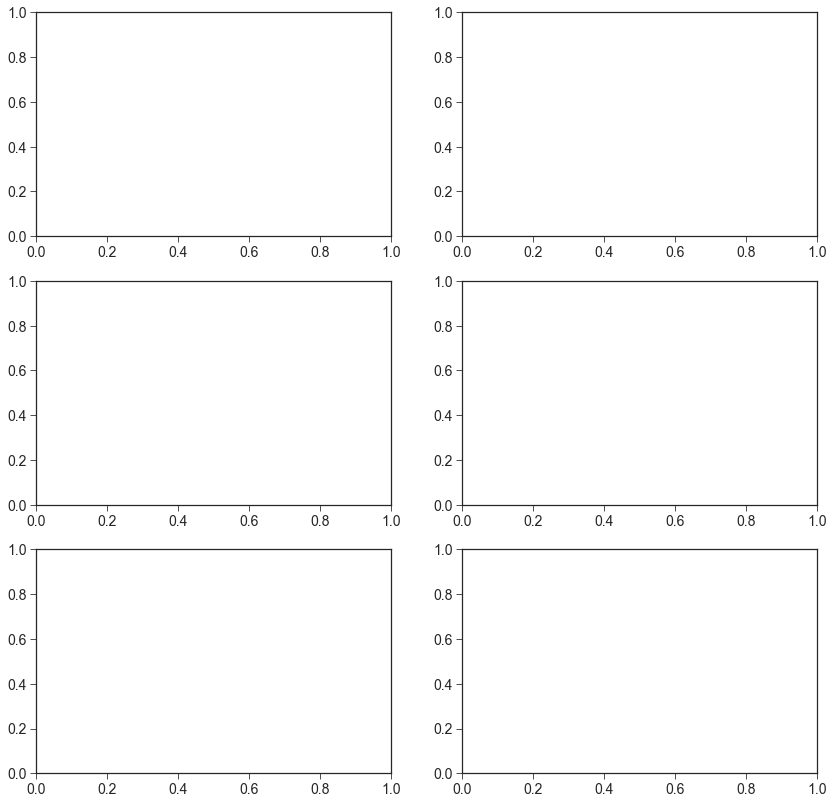

In [40]:
feature_skewed_names = ['Rooms','Square', 'KitchenSquare', 
                        'HouseFloor','Price', 'LifeSquare_proportion']
feature_log_names = []
for f in feature_skewed_names:
    df[f + '_log'] = np.log(df[f])
    feature_log_names.append(f + '_log')
    
df[feature_log_names].hist(figsize=(14,14), bins=50, grid=True);

